In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly as py 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## **DATA CLEANING**


In [2]:
tesla = pd.read_csv('tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,15-03-2019,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
#need to fix date
tesla['Date'] = pd.to_datetime(tesla['Date'], format='%d-%m-%Y')

## **Exploratory Data Analysis**

In [6]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [7]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


In [8]:
# Check for missing values
print(tesla.isnull().sum())



Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


***There is no missing value***

<Axes: >

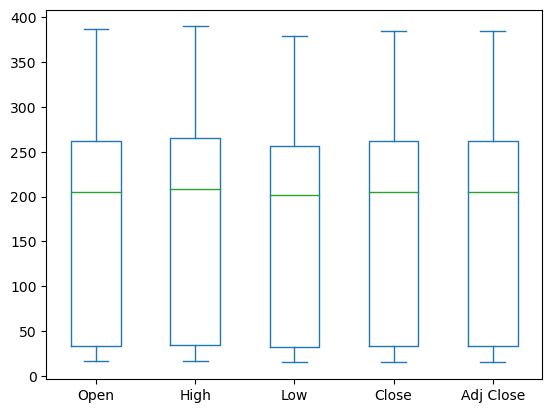

In [9]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



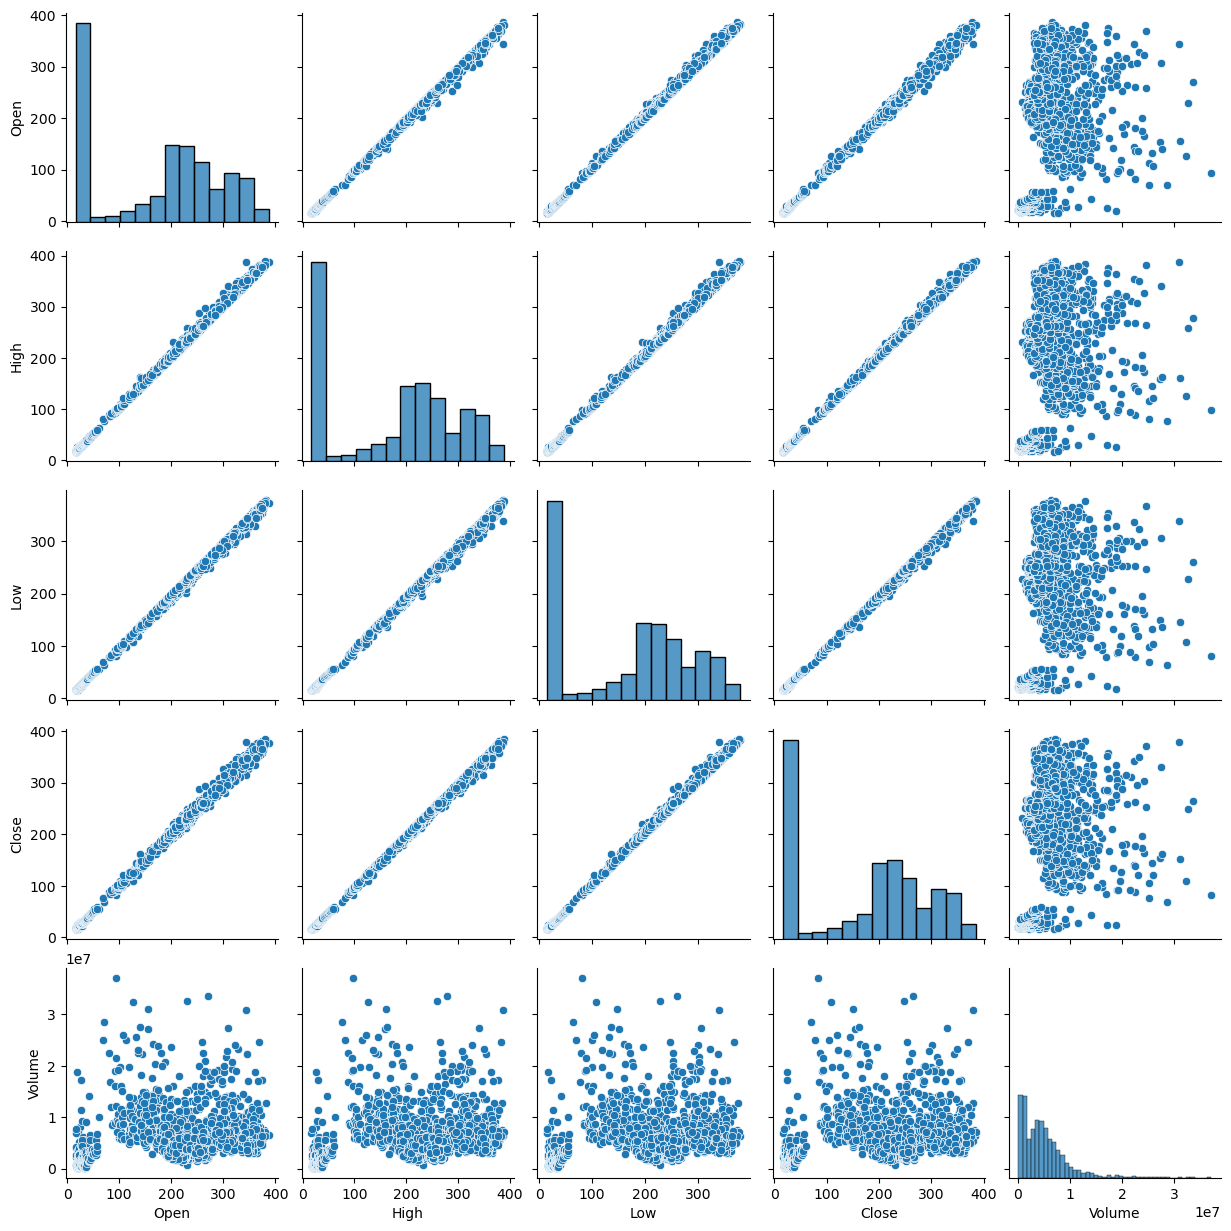

In [10]:
sns.pairplot(tesla[['Open', 'High', 'Low', 'Close', 'Volume']])

**Open, High and Low parameters are more correlated with Close**


In [11]:
tesla['Open'].unique()

array([ 19.      ,  25.790001,  25.      , ..., 283.899994, 292.450012,
       283.51001 ])

In [12]:
tesla['Close'].unique()

array([ 23.889999,  23.83    ,  21.959999, ..., 288.959991, 289.959991,
       275.429993])

In [13]:
tesla.mean()

Date         2014-11-04 14:37:15.841313024
Open                            175.652882
High                            178.710262
Low                             172.412075
Close                           175.648555
Adj Close                       175.648555
Volume                      5077448.948016
dtype: object

In [14]:
tesla.std()

Date         919 days 02:48:37.189440416
Open                          115.580903
High                          117.370092
Low                           113.654794
Close                         115.580771
Adj Close                     115.580771
Volume                    4545398.404881
dtype: object

In [15]:
tesla.median()

Date         2014-11-04 00:00:00
Open                  204.990005
High                  208.160004
Low                   201.669998
Close                 204.990005
Adj Close             204.990005
Volume                 4171700.0
dtype: object

In [16]:
tesla.corr

<bound method DataFrame.corr of            Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...         ...         ...         ...         ...         ...         ...   
2188 2019-03-11  283.519989  291.279999  280.500000  290.920013  290.920013   
2189 2019-03-12  286.489990  288.070007  281.059998  283.359985  283.359985   
2190 2019-03-13  283.899994  291.989990  282.700012  288.959991  288.959991   
2191 2019-03-14  292.450012  295.390015  288.290009  289.959991  289.959991   
2192 2019-03-15  283.510010  283.723999  274.399994  275.429993  275.429993   

        Volume  
0 

In [17]:
# Display the column names to check for correctness
print(tesla.columns)

# Pair plot to visualize relationships between numerical variables

plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<Figure size 640x480 with 0 Axes>

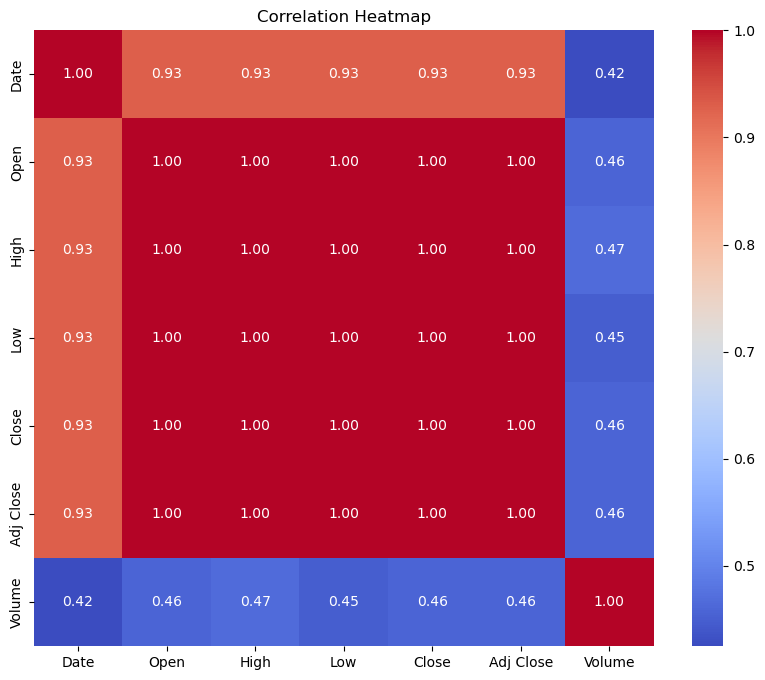

In [18]:
# Correlation heatmap
correlation_matrix = tesla.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **VISUALIZING THE DATA**

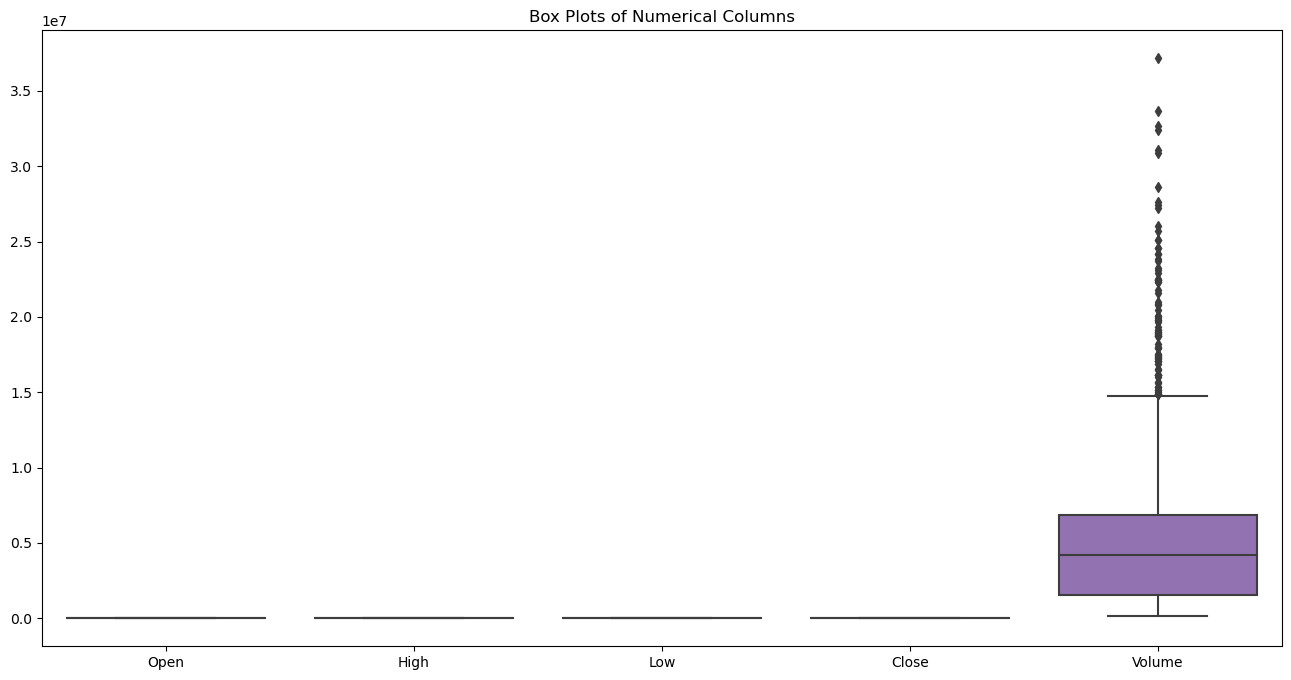

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
tesla = pd.read_csv('tesla.csv')

# Box plots for numerical columns excluding 'Adjusted Close'
plt.figure(figsize=(16, 8))
sns.boxplot(data=tesla[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Box Plots of Numerical Columns')
plt.show()



In [20]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [21]:
#plot(plot) #plotting offline
iplot(plot)

## **Linear Regression**

In [22]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [23]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [24]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [27]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout['title'] = 'Linear Regression - Actual vs. Predicted'
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [28]:
iplot(plot2)


Metric                   Training     
R^2 Score                  0.8682 (86.82%)
Root Mean Squared Error    42.3603
Mean Absolute Error        35.2877
Mean Squared Accuracy      0.8682


Metric                     Test       
R^2 Score                  0.8584 (85.84%)
Root Mean Squared Error    42.8218
Mean Absolute Error        34.8674
Mean Squared Accuracy      0.8584



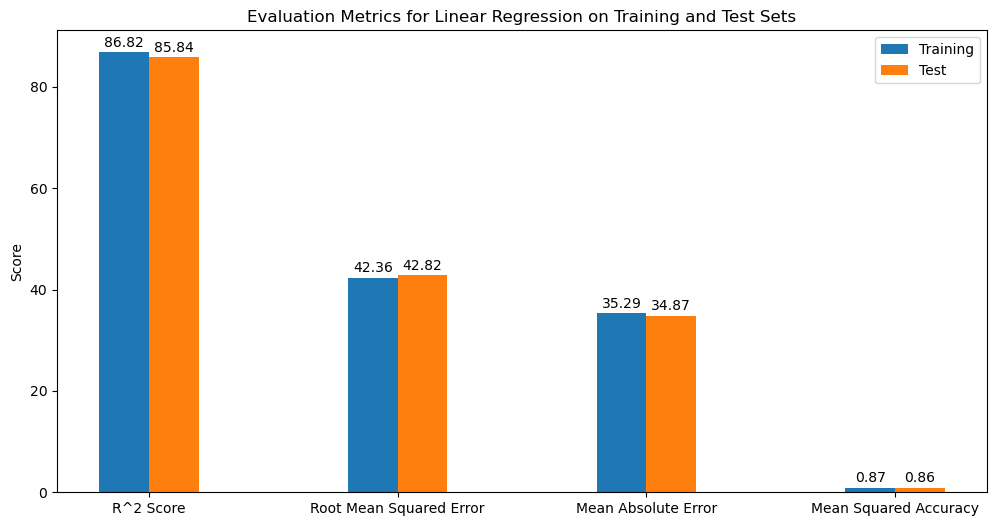

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming you have already defined lm, X_train, Y_train, X_test, and Y_test

# Fit the linear regression model on the training set
lm.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_pred = lm.predict(X_train)

# Calculate R^2 score for training
r2_train = r2_score(Y_train, Y_train_pred)
r2_train_percentage = r2_train * 100

# Calculate RMSE for training
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

# Calculate MAE for training
mae_train = mean_absolute_error(Y_train, Y_train_pred)

# Calculate MSA for training
msa_train = 1 - np.sum((Y_train - Y_train_pred)**2) / np.sum((Y_train - np.mean(Y_train))**2)

# Evaluation metrics for training
training_scores = f'''
{'Metric'.ljust(20)}{'Training'.center(18)}
{'R^2 Score'.ljust(27)}{r2_train:.4f} ({r2_train_percentage:.2f}%)
{'Root Mean Squared Error'.ljust(27)}{rmse_train:.4f}
{'Mean Absolute Error'.ljust(27)}{mae_train:.4f}
{'Mean Squared Accuracy'.ljust(27)}{msa_train:.4f}
'''
print(training_scores)

# Make predictions on the test set
Y_test_pred = lm.predict(X_test)

# Calculate R^2 score for testing
r2_test = r2_score(Y_test, Y_test_pred)
r2_test_percentage = r2_test * 100

# Calculate RMSE for testing
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Calculate MAE for testing
mae_test = mean_absolute_error(Y_test, Y_test_pred)

# Calculate MSA for testing
msa_test = 1 - np.sum((Y_test - Y_test_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Evaluation metrics for testing
evaluation_scores = f'''
{'Metric'.ljust(20)}{'Test'.center(18)}
{'R^2 Score'.ljust(27)}{r2_test:.4f} ({r2_test_percentage:.2f}%)
{'Root Mean Squared Error'.ljust(27)}{rmse_test:.4f}
{'Mean Absolute Error'.ljust(27)}{mae_test:.4f}
{'Mean Squared Accuracy'.ljust(27)}{msa_test:.4f}
'''
print(evaluation_scores)

# Bar graph for both training and test metrics
metrics = ['R^2 Score', 'Root Mean Squared Error', 'Mean Absolute Error', 'Mean Squared Accuracy']
training_scores = [r2_train_percentage, rmse_train, mae_train, msa_train]
test_scores = [r2_test_percentage, rmse_test, mae_test, msa_test]

# Bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
bar_positions_train = np.arange(len(metrics))
bar_positions_test = bar_positions_train + bar_width

ax.bar(bar_positions_train, training_scores, bar_width, label='Training')
ax.bar(bar_positions_test, test_scores, bar_width, label='Test')

ax.set_xticks(bar_positions_train + bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics for Linear Regression on Training and Test Sets')
ax.legend()

# Display the values on top of the bars for both training and test
for i, (train_score, test_score) in enumerate(zip(training_scores, test_scores)):
    ax.text(i, train_score + 0.5, f'{train_score:.2f}', ha='center', va='bottom')
    ax.text(i + bar_width, test_score + 0.5, f'{test_score:.2f}', ha='center', va='bottom')

plt.show()


## **Polynomial Regression of degree 3**

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
#feature prepration 
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [32]:
#model training
lreg3 = LinearRegression()
lreg3.fit(X_train_poly, Y_train)

LinearRegression()

In [33]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg3.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout['title'] = 'Polynomial Regression - Actual vs. Predicted'
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)
iplot(fig3)

In [34]:
# Calculate scores
train_mse = mean_squared_error(Y_train, lreg3.predict(X_train_poly))
test_mse = mean_squared_error(Y_test, lreg3.predict(X_test_poly))

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_msa = np.sum((lreg3.predict(X_train_poly) - np.mean(Y_train))**2)
test_msa = np.sum((lreg3.predict(X_test_poly) - np.mean(Y_test))**2)

train_r2 = r2_score(Y_train, lreg3.predict(X_train_poly))
test_r2 = r2_score(Y_test, lreg3.predict(X_test_poly))

# Formatting and printing scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'R2 Score'.ljust(10)}{train_r2:.4f} ({train_r2 * 100:.2f}%)\t{test_r2:.4f} ({test_r2 * 100:.2f}%)
{'MSE'.ljust(10)}{train_mse:.4f} ({(train_mse / np.mean(Y_train)) * 100:.2f}%)\t{test_mse:.4f} ({(test_mse / np.mean(Y_test)) * 100:.2f}%)
{'RMSE'.ljust(10)}{train_rmse:.4f} ({(train_rmse / np.mean(Y_train)) * 100:.2f}%)\t{test_rmse:.4f} ({(test_rmse / np.mean(Y_test)) * 100:.2f}%)
{'MSA'.ljust(10)}{train_msa:.4f} ({(train_msa / np.sum((Y_train - np.mean(Y_train))**2)) * 100:.2f}%)\t{test_msa:.4f} ({(test_msa / np.sum((Y_test - np.mean(Y_test))**2)) * 100:.2f}%)
'''
print(scores)





Metric           Train                Test        
R2 Score  0.8869 (88.69%)	0.8741 (87.41%)
MSE       1539.7436 (873.70%)	1630.1379 (932.72%)
RMSE      39.2396 (22.27%)	40.3750 (23.10%)
MSA       15884143.8076 (88.69%)	10414098.5573 (91.57%)



C:\Users\achin\AppData\Local\Temp\ipykernel_41308\3285390107.py:40: UserWarning:

FixedFormatter should only be used together with FixedLocator



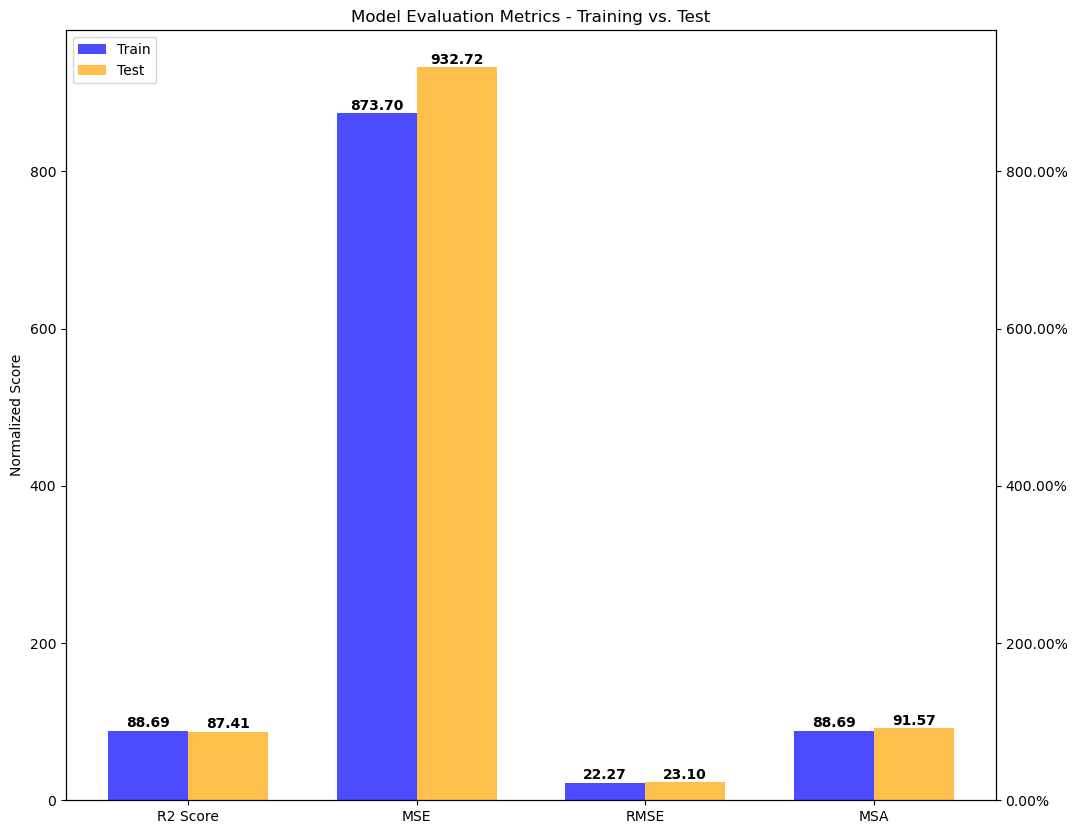

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined train_r2, test_r2, train_mse, test_mse, train_rmse, test_rmse, train_msa, and test_msa

# Normalize the scores
train_r2_norm = train_r2 * 100
test_r2_norm = test_r2 * 100

train_mse_norm = train_mse / np.mean(Y_train) * 100
test_mse_norm = test_mse / np.mean(Y_test) * 100

train_rmse_norm = train_rmse / np.mean(Y_train) * 100
test_rmse_norm = test_rmse / np.mean(Y_test) * 100

train_msa_norm = train_msa / np.sum((Y_train - np.mean(Y_train))**2) * 100
test_msa_norm = test_msa / np.sum((Y_test - np.mean(Y_test))**2) * 100

# Bar graph
metrics = ['R2 Score', 'MSE', 'RMSE', 'MSA']
training_scores = [train_r2_norm, train_mse_norm, train_rmse_norm, train_msa_norm]
test_scores = [test_r2_norm, test_mse_norm, test_rmse_norm, test_msa_norm]

bar_width = 0.35
bar_positions_train = np.arange(len(metrics))
bar_positions_test = bar_positions_train + bar_width  # Increase the distance between train and test bars

fig, ax1 = plt.subplots(figsize=(12, 10))  # Increase the figure width

ax1.bar(bar_positions_train, training_scores, bar_width, label='Train', color='blue', alpha=0.7)
ax1.bar(bar_positions_test, test_scores, bar_width, label='Test', color='orange', alpha=0.7)

ax1.set_xticks(bar_positions_train + bar_width / 2)
ax1.set_xticklabels(metrics)
ax1.set_ylabel('Normalized Score')

# Create a secondary y-axis for percentages
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(['{:.2f}%'.format(x) for x in ax1.get_yticks()])

ax1.set_title('Model Evaluation Metrics - Training vs. Test')
ax1.legend(loc='upper left')

# Display the values on top of the bars for both training and test
for i, score in enumerate(training_scores):
    ax1.text(i, score + 0.5, '{:.2f}'.format(score), ha='center', va='bottom', color='black', fontweight='bold')

for i, score in enumerate(test_scores):
    ax1.text(i + bar_width, score + 0.5, '{:.2f}'.format(score), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


## Ridge Regression + Polynomial Regression 

In [36]:
from sklearn.linear_model import Ridge

In [37]:
#spliting data into 
X = np.array([tesla.index, tesla['Open']]).T
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

#transforming input features
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [38]:
#training model
clf = Ridge(alpha=0.1)
clf.fit(X_train_poly, Y_train) 

C:\Users\achin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=7.12629e-24): result may not be accurate.



Ridge(alpha=0.1)

In [39]:
# plotting predicted and actual values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout['title'] = 'Ridge+Polynomial Regression - Actual vs. Predicted'
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)
iplot(fig3)


In [40]:
# Calculate RMSE, MSE, MSA, R2 for train and test sets
train_rmse = np.sqrt(mse(Y_train, clf.predict(X_train_poly)))
test_rmse = np.sqrt(mse(Y_test, clf.predict(X_test_poly)))

train_mse = mse(Y_train, clf.predict(X_train_poly))
test_mse = mse(Y_test, clf.predict(X_test_poly))

train_msa = np.sum((clf.predict(X_train_poly) - np.mean(Y_train))**2)
test_msa = np.sum((clf.predict(X_test_poly) - np.mean(Y_test))**2)

train_r2 = r2_score(Y_train, clf.predict(X_train_poly))
test_r2 = r2_score(Y_test, clf.predict(X_test_poly))

#printing scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'R2 Score'.ljust(10)}{train_r2:.4f} ({train_r2 * 100:.2f}%)\t{test_r2:.4f} ({test_r2 * 100:.2f}%)
{'MSE'.ljust(10)}{train_mse:.4f} ({(train_mse / np.mean(Y_train)) * 100:.2f}%)\t{test_mse:.4f} ({(test_mse / np.mean(Y_test)) * 100:.2f}%)
{'RMSE'.ljust(10)}{train_rmse:.4f} ({(train_rmse / np.mean(Y_train)) * 100:.2f}%)\t{test_rmse:.4f} ({(test_rmse / np.mean(Y_test)) * 100:.2f}%)
{'MSA'.ljust(10)}{train_msa:.4f} ({(train_msa / np.sum((Y_train - np.mean(Y_train))**2)) * 100:.2f}%)\t{test_msa:.2f} ({(test_msa / np.sum((Y_test - np.mean(Y_test))**2)) * 100:.0f}%)
'''
print(scores) 



Metric           Train                Test        
R2 Score  0.9981 (99.81%)	0.9981 (99.81%)
MSE       24.8396 (14.05%)	25.0612 (14.41%)
RMSE      4.9839 (2.82%)	5.0061 (2.88%)
MSA       17394522.1210 (99.81%)	11892601.58 (100%)



C:\Users\achin\AppData\Local\Temp\ipykernel_41308\1722586843.py:40: UserWarning:

FixedFormatter should only be used together with FixedLocator



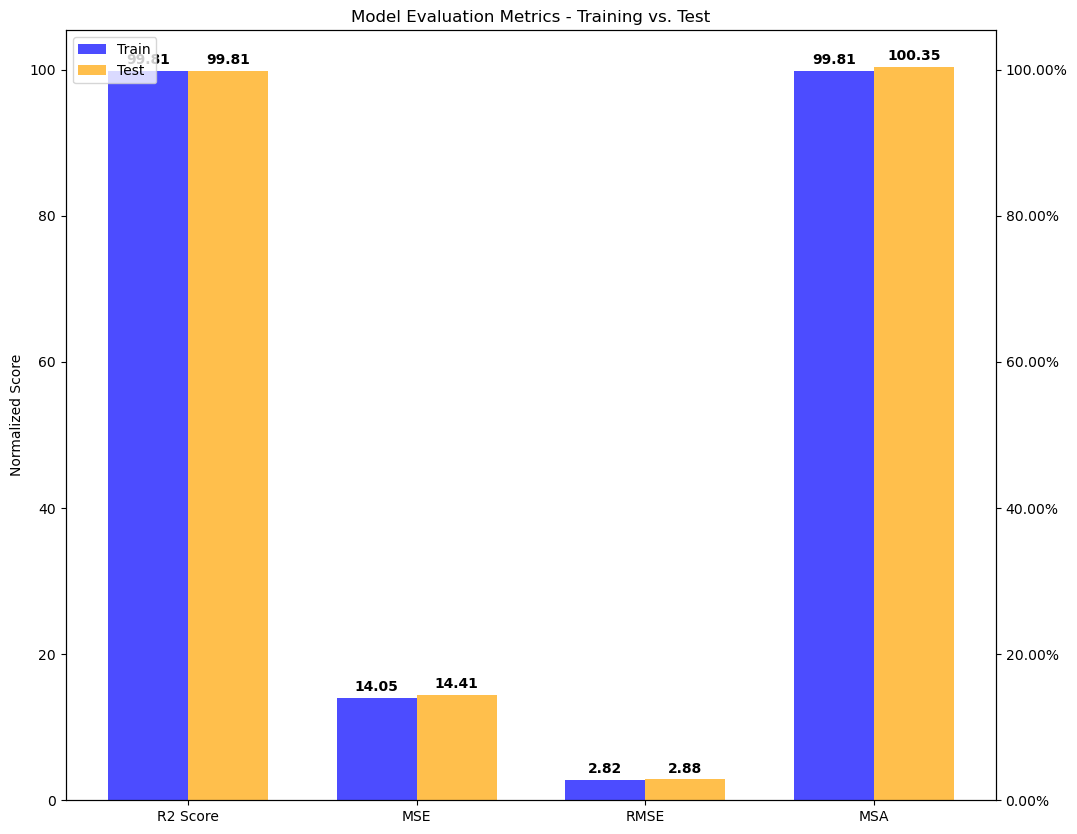

In [41]:
# Assuming you have already defined train_r2, test_r2, train_mse, test_mse, train_rmse, test_rmse, train_msa, and test_msa

# Normalize the scores
train_r2_norm = train_r2 * 100
test_r2_norm = test_r2 * 100

train_mse_norm = train_mse / np.mean(Y_train) * 100
test_mse_norm = test_mse / np.mean(Y_test) * 100

train_rmse_norm = train_rmse / np.mean(Y_train) * 100
test_rmse_norm = test_rmse / np.mean(Y_test) * 100

train_msa_norm = train_msa / np.sum((Y_train - np.mean(Y_train))**2) * 100
test_msa_norm = test_msa / np.sum((Y_test - np.mean(Y_test))**2) * 100

# Bar graph
metrics = ['R2 Score', 'MSE', 'RMSE', 'MSA']
training_scores = [train_r2_norm, train_mse_norm, train_rmse_norm, train_msa_norm]
test_scores = [test_r2_norm, test_mse_norm, test_rmse_norm, test_msa_norm]

bar_width = 0.35
bar_positions_train = np.arange(len(metrics))
bar_positions_test = bar_positions_train + bar_width  # Increase the distance between train and test bars

fig, ax1 = plt.subplots(figsize=(12, 10))  # Increase the figure width

ax1.bar(bar_positions_train, training_scores, bar_width, label='Train', color='blue', alpha=0.7)
ax1.bar(bar_positions_test, test_scores, bar_width, label='Test', color='orange', alpha=0.7)

ax1.set_xticks(bar_positions_train + bar_width / 2)
ax1.set_xticklabels(metrics)
ax1.set_ylabel('Normalized Score')

# Create a secondary y-axis for percentages
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(['{:.2f}%'.format(x) for x in ax1.get_yticks()])

ax1.set_title('Model Evaluation Metrics - Training vs. Test')
ax1.legend(loc='upper left')

# Display the values on top of the bars for both training and test
for i, (train_score, test_score) in enumerate(zip(training_scores, test_scores)):
    ax1.text(i, train_score + 0.5, '{:.2f}'.format(train_score), ha='center', va='bottom', color='black', fontweight='bold')
    ax1.text(i + bar_width, test_score + 0.5, '{:.2f}'.format(test_score), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


## COMPARISON OF THE THREE MODELS 

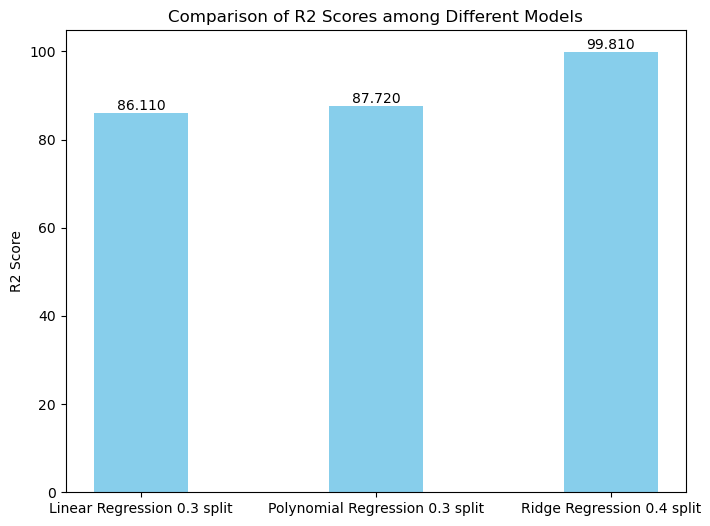

In [11]:
r2_scores = [86.11, 87.72 , 99.81]
model_names = ['Linear Regression 0.3 split', 'Polynomial Regression 0.3 split', 'Ridge Regression 0.4 split']

# Bar graph for comparing R2 scores of different models
fig, ax = plt.subplots(figsize=(8, 6))

bar_positions = np.arange(len(r2_scores))
bar_width = 0.4

ax.bar(bar_positions, r2_scores, bar_width, color='skyblue')

ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names)
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of R2 Scores among Different Models')

# Displaying the R2 scores on top of the bars
for i, score in enumerate(r2_scores):
    ax.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom', fontsize=10)

plt.show()
